In [1]:
import csv
import ndjson
import os
import sys

In [2]:
base_path = os.getcwd().split('sliver-maestro')[0]
root_path = os.path.join(base_path, "sliver-maestro")
print("root_path: {}".format(root_path))

root_path: C:\Users\ozgur\Desktop\sandbox\sliver-maestro


In [3]:
sys.path.insert(1, root_path)
from src.utils.model_utils import *
from src.draw_model import *
from src.generate_images import *

In [4]:
categories_file = os.path.join(root_path, "src", "data", "categories.csv")

In [5]:
with open(categories_file, newline='') as f:
    reader = csv.reader(f)
    categories = {rows[0]:rows[0] for rows in reader}

#### Select a category to download images from 

In [6]:
print('Number of categories: %d' % len(categories))

Number of categories: 345


In [7]:
list(categories.keys())[:10]

['aircraft carrier',
 'airplane',
 'alarm clock',
 'ambulance',
 'angel',
 'animal migration',
 'ant',
 'anvil',
 'apple',
 'arm']

In [11]:
category = input("Selected category from the list above: ") or 'cat'
# Checking to see if the entered category is in the categories dictionary
assert categories.get(category)

Selected category from the list above: cat


In [12]:
print("Creating directories to save images, weights and the model ...")
src_list, dst_list, paths_dict = create_folders(root_path, category)

Creating directories to save images, weights and the model ...
folders are created...


In [13]:
option = input("Select a download method ... \n 1. Use Google Cloud credentials stored in a json file \n 2. Use gsutil in the notebook \n 3. Use gsutil in the terminal \n")

Select a download method ... 
 1. Use Google Cloud credentials stored in a json file 
 2. Use gsutil in the notebook 
 3. Use gsutil in the terminal 
2


In [14]:
if option == "1":
    download_data(src_list, dst_list)
elif option == "2":
    for (src_file, dst_file) in zip(src_list, dst_list): 
        print(src_file, dst_file)
        !gsutil -m cp {'gs://quickdraw_dataset/' + src_file} dst_file
elif option == "3":
    print('Type the following in the terminal to download the files manually:')
    for (src_file, dst_file) in zip(src_list, dst_list):
        print("gsutil -m cp " + "gs://quickdraw_dataset/" + "{}".format(src_file) + " " + "{}".format(dst_file))

full/numpy_bitmap/cat.npy C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\input\cat\cat.npy
full/raw/cat.ndjson C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\raw\cat\cat.ndjson


Copying gs://quickdraw_dataset/full/numpy_bitmap/cat.npy...
/ [0/1 files][    0.0 B/ 92.1 MiB]   0% Done                                    
-
- [0/1 files][  2.1 MiB/ 92.1 MiB]   2% Done                                    
\
|
| [0/1 files][  5.7 MiB/ 92.1 MiB]   6% Done                                    
/
/ [0/1 files][  9.3 MiB/ 92.1 MiB]  10% Done                                    
-
\
\ [0/1 files][ 12.9 MiB/ 92.1 MiB]  13% Done                                    
|
/
/ [0/1 files][ 16.5 MiB/ 92.1 MiB]  17% Done                                    
-
- [0/1 files][ 20.1 MiB/ 92.1 MiB]  21% Done                                    
\
|
| [0/1 files][ 23.7 MiB/ 92.1 MiB]  25% Done                                    
/
-
- [0/1 files][ 27.1 MiB/ 92.1 MiB]  29% Done                                    
\
\ [0/1 files][ 30.7 MiB/ 92.1 MiB]  33% Done                                    
|
/
/ [0/1 files][ 33.8 MiB/ 92.1 MiB]  36% Done                                    
-
- [0/1 files][ 

In [15]:
model_path = os.path.join(paths_dict['input_path'], category, category)


/ [0/1 files][335.3 MiB/496.9 MiB]  67% Done   2.8 MiB/s ETA 00:00:57           
-
- [0/1 files][338.4 MiB/496.9 MiB]  68% Done   2.8 MiB/s ETA 00:00:56           
\
|
| [0/1 files][341.5 MiB/496.9 MiB]  68% Done   2.9 MiB/s ETA 00:00:53           
/
-
- [0/1 files][345.1 MiB/496.9 MiB]  69% Done   3.1 MiB/s ETA 00:00:49           
\
\ [0/1 files][348.7 MiB/496.9 MiB]  70% Done   3.2 MiB/s ETA 00:00:46           
|
/
/ [0/1 files][352.0 MiB/496.9 MiB]  70% Done   3.2 MiB/s ETA 00:00:45           
-
- [0/1 files][353.8 MiB/496.9 MiB]  71% Done   2.9 MiB/s ETA 00:00:50           
\
|
| [0/1 files][357.2 MiB/496.9 MiB]  71% Done   3.0 MiB/s ETA 00:00:47           
/
/ [0/1 files][360.3 MiB/496.9 MiB]  72% Done   2.8 MiB/s ETA 00:00:48           
-
\
\ [0/1 files][363.3 MiB/496.9 MiB]  73% Done   2.7 MiB/s ETA 00:00:50           
|
/
/ [0/1 files][364.3 MiB/496.9 MiB]  73% Done   2.3 MiB/s ETA 00:00:58           
-
- [0/1 files][366.9 MiB/496.9 MiB]  73% Done   2.4 MiB/s ETA 00:00:54     

In [16]:
npy_data = np.load(paths_dict['base_input'] + '.npy', allow_pickle=True)

In [17]:
# load from file-like objects
with open(paths_dict['base_raw'] + '.ndjson') as f:
    ndjson_data = ndjson.load(f)

In [18]:
def plot_bitmap():
    print("Bitmap image:")
    plt.imshow(npy_data[int(index)].reshape(28,28))

In [19]:
def plot_raw():
    print("Raw image:")
    i = 0
    for stroke in ndjson_data[int(index)]['drawing']:
        stroke = np.array(stroke)
        plt.plot(stroke[0], stroke[1]*-1)
        i += 1
    print('There are', i, 'number of strokes in this raw image file!')

There are  123203  images in selected category cat
Select an index value from 0 to 123202 to display and compare bitmap and raw images:
Bitmap image:


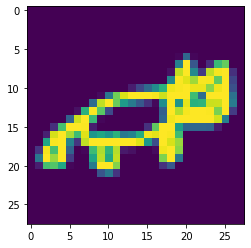

Raw image:
There are 10 number of strokes in this raw image file!


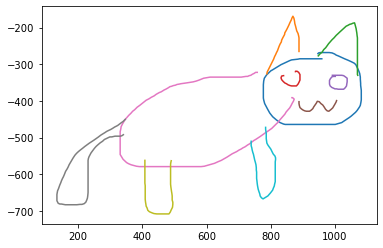

In [33]:
print('There are ', len(npy_data)+1, ' images in selected category', categories[category])
print("Select an index value from 0 to", len(npy_data), "to display and compare bitmap and raw images:")
#index=input()
index = '1'
plot_bitmap()
plt.show()
plot_raw()

In [21]:
# TRAIN TEST SPLIT
filepath = paths_dict['input_path']
x_train, x_test, y_train, y_test = split_data(filepath, categories[category], shuffle=False)

In [22]:
DRAW(model_path, category)

DRAW(
  (encoder): LSTMCell(306, 256)
  (mu_linear): Linear(in_features=256, out_features=10, bias=True)
  (sigma_linear): Linear(in_features=256, out_features=10, bias=True)
  (decoder): LSTMCell(10, 256)
  (dec_linear): Linear(in_features=256, out_features=5, bias=True)
  (dec_w_linear): Linear(in_features=256, out_features=25, bias=True)
  (sigmoid): Sigmoid()
)

In [23]:
train_data = Dataset(x_train)
test_data = Dataset(x_test)

In [24]:
model = DRAW(category)

In [ ]:
# TRAINING AND TESTING
print("training...")
model.start(phase='train') 

## Generating Images

In [34]:
category = 'cat'

In [35]:
test_model = Test(category)

In [36]:
dataloader = test_model.dataloaders['train']

In [37]:
data = dataloader.next_batch(test_model.batch_size)

In [38]:
data.shape

(64, 784)

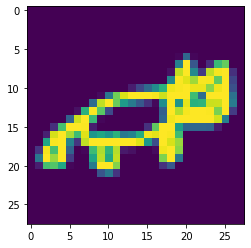

In [39]:
plt.imshow(npy_data[int(index)].reshape(28,28))

reconstructing images...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_0.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_1.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_2.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_3.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_4.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_5.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_6.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_7.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_8.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_9.png


array([[5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01],
       [5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.97320774e-38,
        5.01339469e-39, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00,

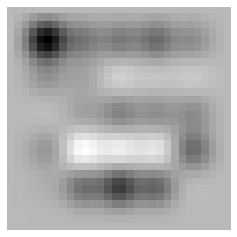

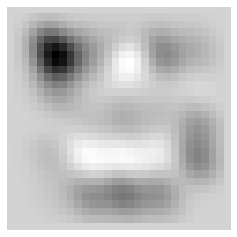

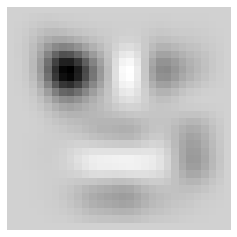

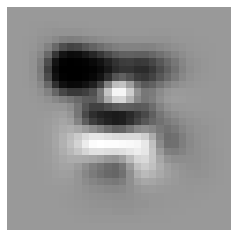

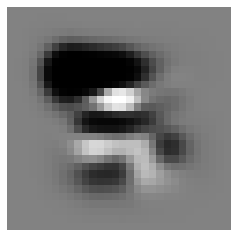

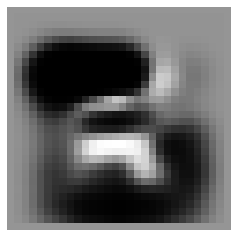

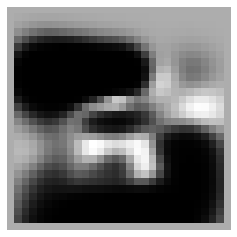

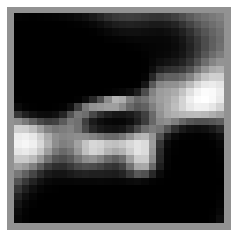

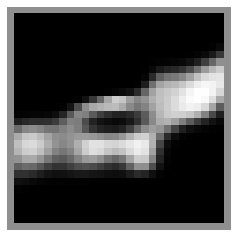

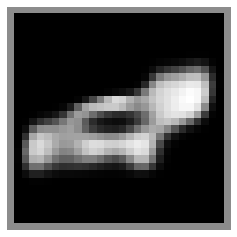

In [40]:
print("reconstructing images...")
test_model.xrecons_grid(int(index), data)